<a href="https://colab.research.google.com/github/jeno1990/Colab-Projects/blob/main/Linear_regression_with_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler

In [2]:
path = "/content/drive/MyDrive/Colab/Housing.csv" #read data from drive
data = pd.read_csv(path)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# remove unused columns
columns_to_keep = ['area', 'bedrooms', 'bathrooms', 'hotwaterheating', 'airconditioning', 'price']
data = data[columns_to_keep]
data.head()

,area,bedrooms,bathrooms,hotwaterheating,airconditioning,price
0,7420,4,2,no,yes,13300000
1,8960,4,4,no,yes,12250000
2,9960,3,2,no,no,12250000
3,7500,4,2,no,yes,12215000
4,7420,4,1,no,yes,11410000


In [4]:
data.info() # Provides a concise summary of the DataFram

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   area             545 non-null    int64 
 1   bedrooms         545 non-null    int64 
 2   bathrooms        545 non-null    int64 
 3   hotwaterheating  545 non-null    object
 4   airconditioning  545 non-null    object
 5   price            545 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 25.7+ KB


In [5]:
data.describe() # Provides descriptive statistics for numeric columns in the DataFrame

,area,bedrooms,bathrooms,price
count,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,4.766729e+06
std,2170.141023,0.738064,0.502470,1.870440e+06
min,1650.000000,1.000000,1.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,1.330000e+07


In [6]:
missing_values = data.isnull().sum() # to see if there are any null values in the data set
print(missing_values)

area               0
bedrooms           0
bathrooms          0
hotwaterheating    0
airconditioning    0
price              0
dtype: int64


In [7]:
#This will fill the missing values with midian of the other values if exist.
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    if data[column].isnull().sum() > 0:
        median_value = data[column].median()
        data[column].fillna(median_value, inplace=True)

In [8]:
# Label encoding categorical variables 'hotwaterheating' and 'airconditioning' to convert them into numerical values
label_encoder = LabelEncoder()

data['hotwaterheating'] = label_encoder.fit_transform(data['hotwaterheating'])
data['airconditioning'] = label_encoder.fit_transform(data['airconditioning'])

print(data)

     area  bedrooms  bathrooms  hotwaterheating  airconditioning     price
0    7420         4          2                0                1  13300000
1    8960         4          4                0                1  12250000
2    9960         3          2                0                0  12250000
3    7500         4          2                0                1  12215000
4    7420         4          1                0                1  11410000
..    ...       ...        ...              ...              ...       ...
540  3000         2          1                0                0   1820000
541  2400         3          1                0                0   1767150
542  3620         2          1                0                0   1750000
543  2910         3          1                0                0   1750000
544  3850         3          1                0                0   1750000

[545 rows x 6 columns]


In [9]:
# Separate features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Standardization
scaler = StandardScaler()
# scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
print(X_scaled_df , y)

         area  bedrooms  bathrooms  hotwaterheating  airconditioning
0    1.046726  1.403419   1.421812        -0.219265         1.472618
1    1.757010  1.403419   5.405809        -0.219265         1.472618
2    2.218232  0.047278   1.421812        -0.219265        -0.679063
3    1.083624  1.403419   1.421812        -0.219265         1.472618
4    1.046726  1.403419  -0.570187        -0.219265         1.472618
..        ...       ...        ...              ...              ...
540 -0.991879 -1.308863  -0.570187        -0.219265        -0.679063
541 -1.268613  0.047278  -0.570187        -0.219265        -0.679063
542 -0.705921 -1.308863  -0.570187        -0.219265        -0.679063
543 -1.033389  0.047278  -0.570187        -0.219265        -0.679063
544 -0.599839  0.047278  -0.570187        -0.219265        -0.679063

[545 rows x 5 columns] 0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543 

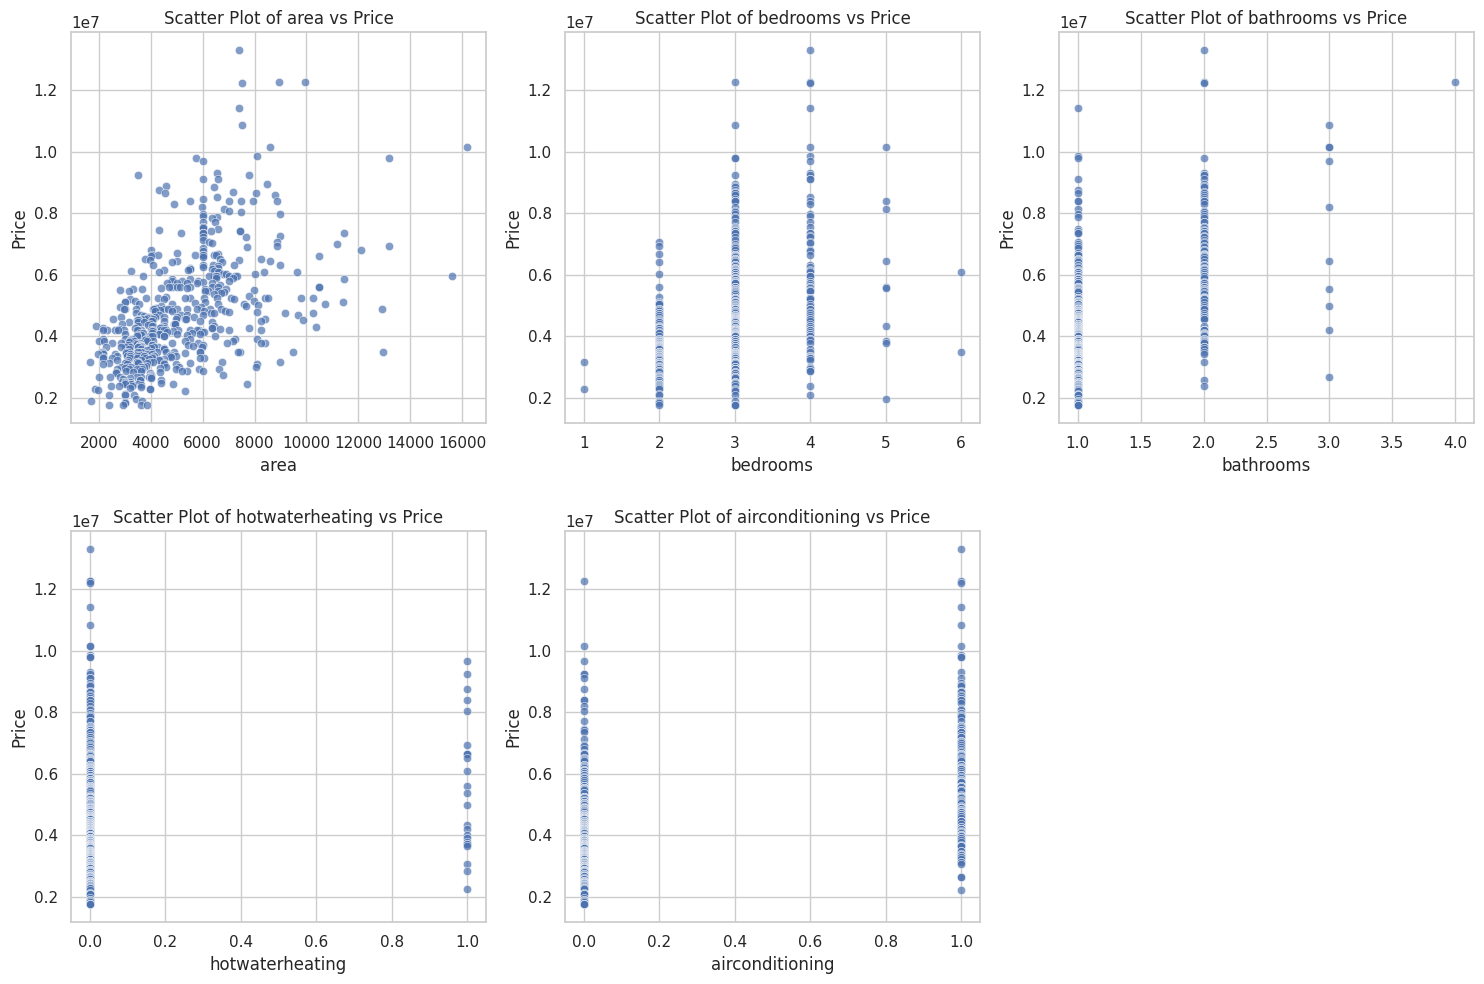

In [10]:
# Set the style of seaborn
sns.set(style='whitegrid')
# Create scatter plots for each feature
# features = ['area', 'bedrooms', 'bathrooms', 'hotwaterheating', 'airconditioning']
features = X.columns.tolist()


plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=data, x=feature, y='price', alpha=0.7)
    plt.title(f'Scatter Plot of {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


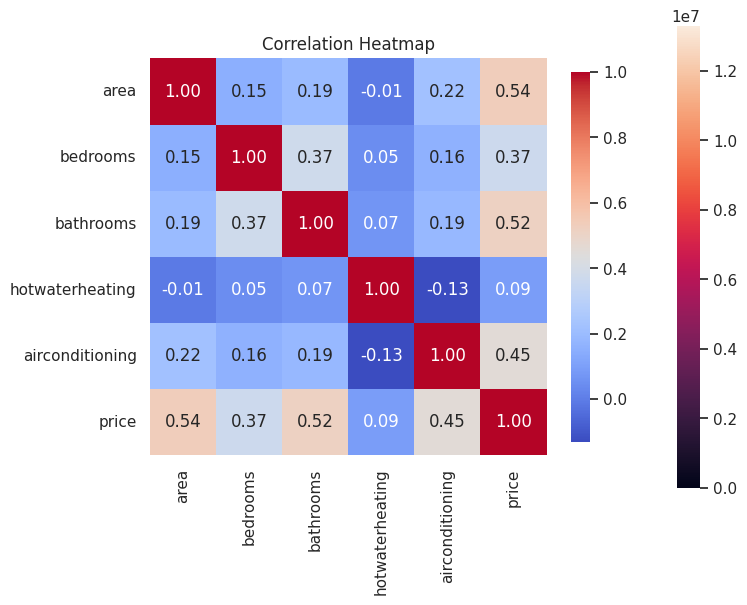

In [11]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(data)
# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [13]:
# The linear regresion model implemeted with Normal Function
class LinearRegressionFromScratch:
    def __init__(self):
        self.theta = None  # Model parameters

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term (bias)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # Calculate theta using the Normal Equation
        X_b_inverse = np.linalg.pinv(X_b.T.dot(X_b))
        self.theta = X_b_inverse.dot(X_b.T).dot(y)


    def predict(self, X):
        # Add a column of ones to X for the intercept term (bias)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)


model = LinearRegressionFromScratch()

# Fit the model to the training data
model.fit(X_train, y_train)
y_pred = model.predict(X_train)


In [14]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}\n")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 2346728742911.688

R^2 Score: 0.5357214108159272


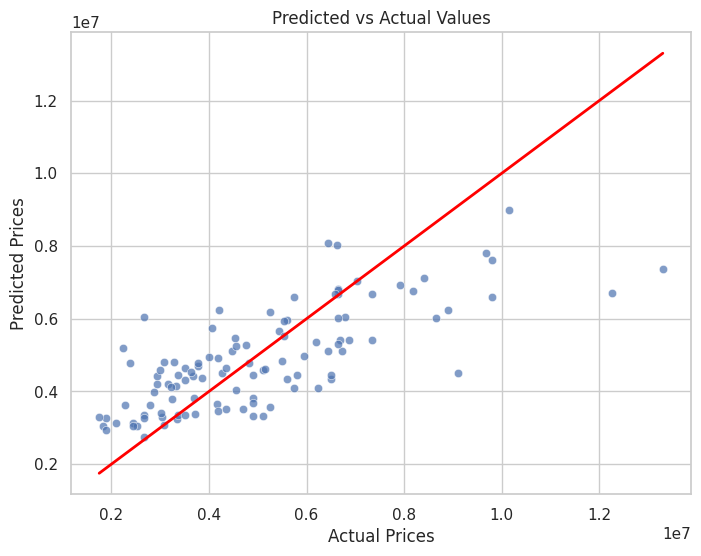

In [15]:
# Scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line y = x
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()